## Calculating $ M $ for the Target Distribution $ f(x) $

### Step 1: Define the Target Distribution $ f(x) $
The given probability density function (PDF) is:
$$
f(x) =
\begin{cases} 
\frac{\exp(x^2) - 1}{\exp(1) - 1}, & 0 < x < 1, \\
0, & \text{otherwise}.
\end{cases}
$$

### Step 2: Choose the Proposal Distribution $ g(x) $
We choose a uniform distribution:
$$
g(x) = 1, \quad 0 < x < 1.
$$
This proposal distribution is simple and fully covers the target distribution.

### Step 3: Find the Ratio $ \frac{f(x)}{g(x)} $
Since \( g(x) = 1 \), the ratio simplifies to:
$$
\frac{f(x)}{g(x)} = f(x) = \frac{\exp(x^2) - 1}{\exp(1) - 1}.
$$

### Step 4: Determine $ M = \sup_x f(x) $
To calculate \( M \), find the maximum value of \( f(x) \) over \( 0 < x < 1 \):
1. \( f(x) \) achieves its maximum at \( x = 1 \) because \( \exp(x^2) \) is an increasing function.
2. Evaluate \( f(1) \):
   $$
   f(1) = \frac{\exp(1^2) - 1}{\exp(1) - 1} = 1.
   $$

### Final Scaling Factor
The scaling factor is:
$$
M = 1.
$$


### Step 1: Understand the Target Distribution  
The target cumulative distribution function (CDF) $F(x)$ is defined as:  
$$
F(x) =
\begin{cases} 
0, & x \leq 0, \\ 
\frac{\exp(x^2) - 1}{\exp(1) - 1}, & 0 < x < 1, \\
1, & x \geq 1.
\end{cases}
$$

The corresponding probability density function (PDF) $f(x)$ is obtained by differentiating $F(x)$:
$$
f(x) =
\begin{cases} 
\frac{2x \exp(x^2)}{\exp(1) - 1}, & 0 < x < 1, \\
0, & \text{otherwise}.
\end{cases}
$$

---

### Step 2: Choose a Proposal Distribution  
To sample from $f(x)$, we use rejection sampling. A simple choice for the proposal distribution is the uniform distribution over $[0,1]$:  
$$
g(x) = 
\begin{cases}
1, & 0 \leq x \leq 1, \\
0, & \text{otherwise}.
\end{cases}
$$

---

### Step 3: Derive the Acceptance Condition  
Rejection sampling requires finding a constant $M$ such that:  
$$
f(x) \leq M \cdot g(x), \quad \text{for all } x \text{ in } [0,1].
$$
Since $g(x) = 1$ on $[0,1]$, this simplifies to:  
$$
f(x) \leq M, \quad \text{for all } x \text{ in } [0,1].
$$

---

### Step 4: Determine $M = \sup_x f(x)$  
To calculate $M$, find the maximum value of $f(x)$ over $0 < x < 1$:  
1. The function $f(x) = \frac{2x \exp(x^2)}{\exp(1) - 1}$ is increasing on $[0,1]$ because $x \exp(x^2)$ grows as $x$ increases.  
2. The maximum occurs at $x = 1$. Evaluate $f(1)$:
   $$
   f(1) = \frac{2 \cdot 1 \cdot \exp(1^2)}{\exp(1) - 1} = \frac{2e}{e - 1}.
   $$

Thus, $M = \frac{2e}{e - 1}$.

---

### Step 5: Rejection Sampling Algorithm  
The rejection sampling steps are as follows:  
1. Draw a candidate $X'$ from the proposal distribution $g(x)$, which is Uniform$(0,1)$.  
2. Compute the acceptance ratio:
   $$
   R = \frac{f(X')}{M}.
   $$  
3. Draw a random value $U$ from Uniform$(0,1)$.  
4. Accept $X'$ if $U \leq R$. Otherwise, reject $X'$ and repeat.  

Repeat this process until the desired number of samples is obtained.


In [69]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
from Utils import timeout

@timeout(seconds=10)
def problem1_inversion(n_samples=1):
    """
    Uses rejection sampling to generate n_samples from the distribution:

       f(x) = (2 x e^(x^2)) / ( e - 1 ), for 0 < x < 1
       f(x) = 0, otherwise.

    Returns a numpy array of length n_samples.
    """
    samples = []
    
    # PDF of our target distribution
    def f(x):
        if 0 < x < 1:
            return (2.0 * x * np.exp(x**2)) / (np.e - 1.0)
        else:
            return 0.0

    # Proposal distribution is Uniform(0,1) => g(x) = 1 on [0,1].
    # We need M such that f(x) <= M*g(x). Derived M = 2 e / ( e - 1 ).
    M = 2.0 * np.e / (np.e - 1.0)

    while len(samples) < n_samples:
        # 1) Sample from proposal g(x) = Uniform(0,1)
        X_candidate = np.random.rand()  # in [0,1]
        
        # 2) Compute ratio f(X_candidate) / [M*g(X_candidate)] = f(X_candidate)/M since g=1
        pdf_val = f(X_candidate)
        ratio = pdf_val / M
        
        # 3) Draw U ~ Uniform(0,1) for the acceptance test
        U = np.random.rand()
        if U <= ratio:
            samples.append(X_candidate)
    
    return np.array(samples)



In [70]:
try:
    problem1_samples = problem1_inversion(n_samples=100000)
    print(f"Generated {len(problem1_samples)} samples successfully.")
except TimeoutError:
    print("The function timed out. Try reducing the sample size.")

Generated 100000 samples successfully.


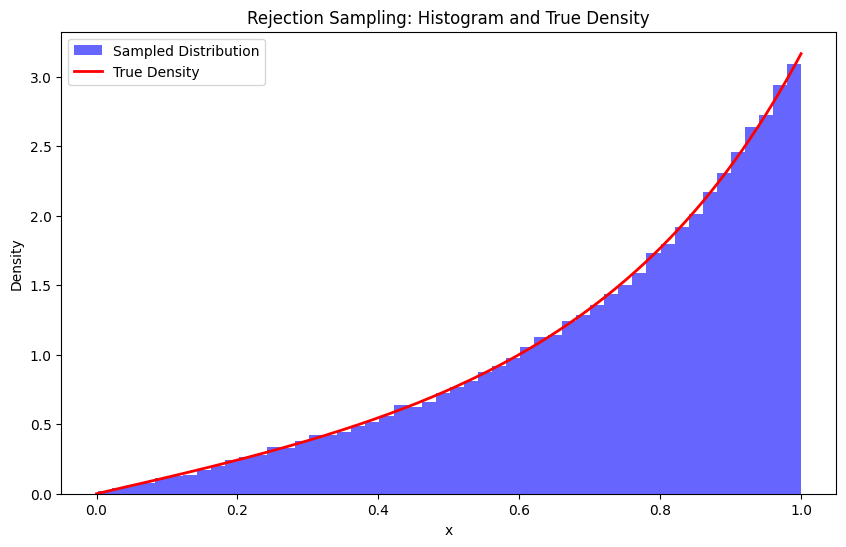

In [71]:
# Plot the histogram of the samples
x_vals = np.linspace(0, 1, 1000)
true_density = [((2.0 * x * np.exp(x**2)) / (np.e - 1.0)) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='blue', label="Sampled Distribution")
plt.plot(x_vals, true_density, color='red', linewidth=2, label="True Density")
plt.title("Rejection Sampling: Histogram and True Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [34]:
# Define the function for the integral
def integrand(x):
    return np.sin(x) * (2 * np.exp(x**2) * x) / (np.exp(1) - 1)

# Use the 100,000 samples (problem1_samples)
f_values = integrand(problem1_samples)

# Part 3
problem1_integral = np.mean(f_values)
problem1_integral

np.float64(1.2446967694672186)

In [35]:
# Hoeffding's inequality: Calculate epsilon
delta = 0.05  # 95% confidence
n_samples = len(problem1_samples)
epsilon = np.sqrt(np.log(2 / delta) / (2 * n_samples))

# Part 4
problem1_interval = [problem1_integral - epsilon, problem1_integral + epsilon]

In [36]:
problem1_interval

[np.float64(1.2404020753837512), np.float64(1.248991463550686)]

### Step 1: Understand the Target Distribution  
The target probability density function (PDF) $f_X(x)$ is defined as:  
$$
f_X(x) =
\begin{cases} 
20 \cdot \exp(20 - 1/x) \cdot \left(1 + \frac{1}{x}\right), & 0 < x < \frac{1}{20}, \\ 
0, & \text{otherwise}.
\end{cases}
$$

Key observations:
1. The PDF $f_X(x)$ is **heavily skewed** and spikes near $x = \frac{1}{20}$.  
2. It is zero for $x \leq 0$ or $x \geq \frac{1}{20}$.  

We aim to sample random values $x$ from $f_X(x)$ using **rejection sampling**.

---

### Step 2: Choose a Proposal Distribution  
For rejection sampling, we need a simpler proposal distribution $g_X(x)$ that satisfies:
1. $g_X(x) > 0$ wherever $f_X(x) > 0$.  
2. $f_X(x) \leq M \cdot g_X(x)$ for some constant $M > 0$.

We choose $g_X(x)$ as a **Uniform distribution** over $(0, \frac{1}{20})$:  
$$
g_X(x) =
\begin{cases}
20, & 0 < x < \frac{1}{20}, \\
0, & \text{otherwise}.
\end{cases}
$$

This choice is simple because:
- It is easy to sample $x \sim g_X(x)$.  
- The constant value $g_X(x) = 20$ simplifies calculations.

---

### Step 3: Derive the Acceptance Condition  
Rejection sampling requires finding a constant $M$ such that:  
$$
f_X(x) \leq M \cdot g_X(x), \quad \forall x \in \left(0, \frac{1}{20}\right).
$$

Substituting $g_X(x) = 20$:  
$$
\frac{f_X(x)}{g_X(x)} = \frac{f_X(x)}{20} \leq M.
$$

Thus, the acceptance condition simplifies to:  
$$
f_X(x) \leq M \cdot 20, \quad \text{or equivalently,} \quad \frac{f_X(x)}{20} \leq M.
$$

---

### Step 4: Determine $M = \sup_x \frac{f_X(x)}{g_X(x)}$  
To calculate $M$, we evaluate the ratio:
$$
\frac{f_X(x)}{g_X(x)} = \frac{20 \cdot \exp(20 - 1/x) \cdot \left(1 + \frac{1}{x}\right)}{20} = \exp(20 - 1/x) \cdot \left(1 + \frac{1}{x}\right).
$$

- The function $\exp(20 - 1/x) \cdot (1 + 1/x)$ increases as $x \to \frac{1}{20}$.  
- At $x = \frac{1}{20}$, we compute:
  $$
  \exp(20 - 1/x) \cdot \left(1 + \frac{1}{x}\right) = \exp(20 - 20) \cdot \left(1 + 20\right) = 21.
  $$

Thus, the bounding constant is $M = 21$.

---

### Step 5: Rejection Sampling Algorithm  
The rejection sampling steps are as follows:

1. **Propose a candidate**:  
   Draw $X_{\text{cand}} \sim g_X(x) = \text{Uniform}(0, \frac{1}{20})$.

2. **Compute the acceptance ratio**:  
   $$
   R = \frac{f_X(X_{\text{cand}})}{M \cdot g_X(X_{\text{cand}})}.
   $$
   Substituting $g_X(x) = 20$:  
   $$
   R = \frac{f_X(X_{\text{cand}})}{M \cdot 20}.
   $$

3. **Draw a random value**:  
   Draw $U \sim \text{Uniform}(0, 1)$.

4. **Accept/Reject**:  
   - Accept $X_{\text{cand}}$ if $U \leq R$.  
   - Otherwise, reject $X_{\text{cand}}$ and repeat.

5. Repeat steps 1–4 until the desired number of samples is obtained.


In [51]:
import numpy as np

def problem1_inversion_2(n_samples=10000):
    """
    Simple rejection sampling with Uniform(0,1/20).
    Very straightforward but might reject ~95% of proposals.
    """
    def f_target(x):
        if 0 < x < 1/20:
            return 20.0 * np.exp(20.0 - 1.0/x) * (1.0 + 1.0/x)
        else:
            return 0.0

    # Uniform(0,1/20) => g(x) = 20 for x in (0,1/20).
    # We know M=21 from analysis.
    M = 21.0
    
    samples = []
    while len(samples) < n_samples:
        # 1) Propose
        x_cand = np.random.uniform(0, 1/20)
        
        # 2) Acceptance ratio
        fx = f_target(x_cand)
        gx = 20.0  # PDF of uniform(0,1/20)
        ratio = fx / (M * gx)

        # 3) Draw U
        if np.random.rand() < ratio:
            samples.append(x_cand)
    
    return np.array(samples)


In [63]:
problem1_2_samples = problem1_inversion_2(n_samples=100000)

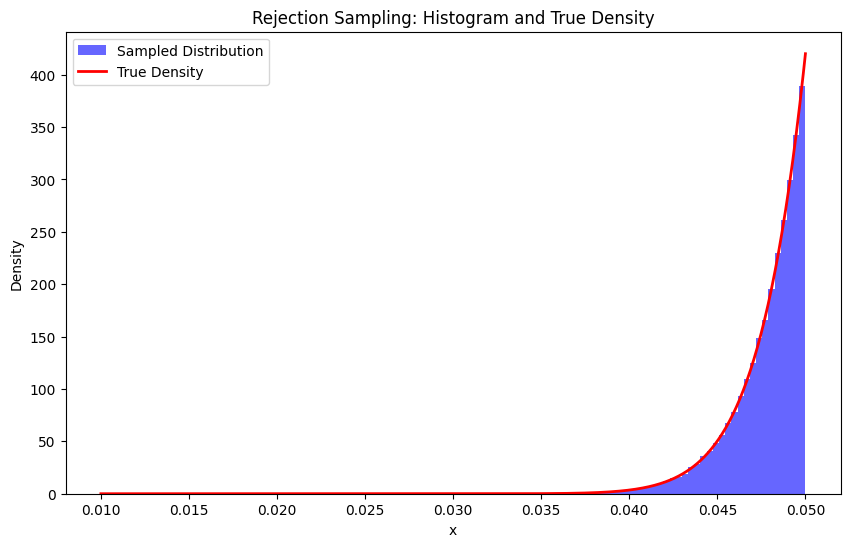

In [68]:
# Plot the histogram of the samples
x_vals = np.linspace(0.01, 1/20, 1000)
true_density = [(20.0 * np.exp(20.0 - 1.0/x) * (1.0 + 1.0/x)) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.hist(problem1_2_samples, bins=50, density=True, alpha=0.6, color='blue', label="Sampled Distribution")
plt.plot(x_vals, true_density, color='red', linewidth=2, label="True Density")
plt.title("Rejection Sampling: Histogram and True Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# Markov Chains

In [1]:
import numpy as np

In [2]:
P1 = np.array([[0.8, 0.2, 0, 0],[0.6, 0.2, 0.2, 0],[0, 0.4, 0, 0.6],[0, 0, 0.8, 0.2]])

In [4]:
P1

array([[0.8, 0.2, 0. , 0. ],
       [0.6, 0.2, 0.2, 0. ],
       [0. , 0.4, 0. , 0.6],
       [0. , 0. , 0.8, 0.2]])

In [12]:
evals, evecs = np.linalg.eig(P1.T)

In [10]:
evals

array([-0.66055513,  0.06055513,  1.        ,  0.8       ])

In [11]:
evecs

array([[-1.57576216e-01, -6.18338687e-01, -9.30680081e-01,
        -8.16496581e-01],
       [ 3.83581250e-01,  7.62045619e-01, -3.10226694e-01,
        -3.20000334e-16],
       [-7.46443921e-01,  4.35109581e-02, -1.55113347e-01,
         4.08248290e-01],
       [ 5.20438886e-01, -1.87217890e-01, -1.16335010e-01,
         4.08248290e-01]])

In [26]:
stationary = evecs[:,2]/np.sum(evecs[:,2])

In [19]:
from fractions import Fraction

In [28]:
[Fraction(s).limit_denominator() for s in stationary]

[Fraction(8, 13), Fraction(8, 39), Fraction(4, 39), Fraction(1, 13)]

In [29]:
P2 = np.array([[0, 0.2, 0, 0.8],[0, 0, 1, 0],[0, 1, 0, 0],[0.5, 0, 0.5, 0]])

In [30]:
evals, evecs = np.linalg.eig(P2.T)

In [31]:
evals

array([-1.        , -0.63245553,  0.63245553,  1.        ])

In [32]:
evecs

array([[ 8.26495057e-17, -4.38529010e-01,  4.38529010e-01,
         7.85046229e-16],
       [-7.07106781e-01, -5.54700196e-01, -5.54700196e-01,
         7.07106781e-01],
       [ 7.07106781e-01,  4.38529010e-01, -4.38529010e-01,
         7.07106781e-01],
       [ 1.55737187e-16,  5.54700196e-01,  5.54700196e-01,
         8.63550852e-16]])

In [33]:
stationary2 = evecs[:,-1]/np.sum(evecs[:,-1])

In [34]:
stationary2

array([5.55111512e-16, 5.00000000e-01, 5.00000000e-01, 6.10622664e-16])

In [35]:
P3 = np.array([[0.2, 0.3, 0, 0, 0.5],[0.2, 0.2, 0.6, 0, 0],[0, 0.4, 0, 0.6, 0],[0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])

In [36]:
P3

array([[0.2, 0.3, 0. , 0. , 0.5],
       [0.2, 0.2, 0.6, 0. , 0. ],
       [0. , 0.4, 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0.6, 0.4],
       [0. , 0. , 0. , 0.4, 0.6]])

In [37]:
evals, evecs = np.linalg.eig(P3.T)

In [38]:
evals

array([-0.43966678,  1.        ,  0.1608228 ,  0.2       ,  0.67884398])

In [39]:
evecs

array([[-1.61982825e-01,  2.41988097e-16, -5.88749523e-02,
        -3.37590681e-15, -1.90056864e-01],
       [ 5.18075160e-01,  0.00000000e+00,  1.15327795e-02,
         5.26480705e-16, -4.55037926e-01],
       [-7.07001554e-01,  1.07550265e-16,  4.30266591e-02,
         2.86349238e-15, -4.02187783e-01],
       [ 4.43726725e-01,  7.07106781e-01, -7.03016027e-01,
         7.07106781e-01,  3.70894000e-01],
       [-9.28175058e-02,  7.07106781e-01,  7.07331540e-01,
        -7.07106781e-01,  6.76388573e-01]])

In [40]:
stationary3 = evecs[:,1]/np.sum(evecs[:,1])

In [41]:
stationary3

array([1.71111424e-16, 0.00000000e+00, 7.60495219e-17, 5.00000000e-01,
       5.00000000e-01])

In [42]:
[Fraction(s).limit_denominator() for s in stationary3]

[Fraction(0, 1),
 Fraction(0, 1),
 Fraction(0, 1),
 Fraction(1, 2),
 Fraction(1, 2)]

In [43]:
P4 = np.array([[0.8, 0.2, 0, 0],[0.6, 0.2, 0.2, 0],[0, 0.4, 0, 0.6],[0.1, 0, 0.7, 0.2]])

In [44]:
evals, evecs = np.linalg.eig(P4.T)

In [45]:
evals

array([-0.62210672,  0.06823162,  1.        ,  0.7538751 ])

In [46]:
evecs

array([[ 0.20617053,  0.60076399, -0.94153129, -0.81332884],
       [-0.40095999, -0.76852983, -0.29815157, -0.00871773],
       [ 0.72099449, -0.04721217, -0.1255375 ,  0.39459308],
       [-0.52620503,  0.214978  , -0.09415313,  0.4274535 ]])

In [47]:
stationary4 = evecs[:,2]/np.sum(evecs[:,2])

In [48]:
stationary4

array([0.64516129, 0.20430108, 0.08602151, 0.06451613])

In [49]:
[Fraction(s).limit_denominator() for s in stationary4]

[Fraction(20, 31), Fraction(19, 93), Fraction(8, 93), Fraction(2, 31)]

In [50]:
test = np.array([[0.5, 0.5, 0],[0.5, 0, 0.5],[0.5, 0, 0.5]])

In [67]:
np.matrix(test)**3

matrix([[0.5 , 0.25, 0.25],
        [0.5 , 0.25, 0.25],
        [0.5 , 0.25, 0.25]])